In [3]:
import pandas as pd
import re

In [4]:
# 학생운동 데이터프레임 선언
# sm = student movement
sm = pd.read_excel('공훈록 전체_JH.xlsx', sheet_name= "Sheet3")
sm

,MNG_NO,NAME_KO,WORKOUT_AFFIL,CONTENT
0,80802,문길환,학생운동,1929년 12월 부산제2공립상업학교 재학 중 광주학생운동에 호응하는 동맹휴교를 계...
1,42952,이철주,학생운동,1940년 11월 경기중학교 재학 중 동창생 마츠하라[松原博]와 가회동(嘉會洞) 자...
2,41893,이권재,학생운동,1940년대 초반 일본 제국주의 타도를 위해 비밀결사를 조직하여 활동하다 체포되어 ...
3,40943,김종윤,학생운동,1940년 11월 서울 경기공립중학교 제5학년 재학 중 비밀결사 조선인해방투쟁동맹에...
4,50673,이세원,학생운동,충남 예산(禮山) 사람이다.\n1929년 서울 협성실업학교(協成實業學校) 3학년에 ...
...,...,...,...,...
671,957797,최심,학생운동,1929년 11월 전남 광주에서 광주여자고등보통학교 재학 중 광주학생운동에 참여하였...
672,957800,이정,학생운동,1929년 11월 전남 광주여자고등보통학교 재학 중 광주학생운동 동조시위에 참여했다...
673,964648,정창희,학생운동,1930년 1월 충남 예산공립농업학교(禮山公立農業學校) 2학년 재학 중 광주학생운동...
674,964753,최용식,학생운동,1930년 전남 여수에서 여수공립수산학교 재학 중 맹휴주도자로 활동하다 퇴학 처분을...


In [5]:
# 원하는 데이터형이 나오는지 확인하는 코드

# str
type(sm['CONTENT'][0])

# list
type(sm['CONTENT'][0].split('.'))

# 이름
sm['NAME_KO'][139]

'박종식'

In [6]:
# 예시로 1개의 구문만 호출하여 코딩, 임시구간
# temporary_list
# list형
sm_t_list = sm['CONTENT'][139].split('.')
sm_list = []

# 문장에 학교라는 단어가 들어가있으면, 리스트에 하나씩 추가한다.
for x in sm_t_list:
    if "학교" in x:
        sm_list.append(x)
print(sm_list)

['\n전남 목포(木浦)공립상업학교 3학년에 재학 중이던 1929년 11월, 광주(光州)에서 대대적인 학생시위항쟁이 벌어져 수십 명이 피검되었다는 소식에 접한 그는 최창호(崔昌鎬) 등 동교 학생들과 수 차 회합하고, 목포에서도 동월 19일을 기해 동조시위를 벌이기로 결의하였다', '\n드디어 19일 아침 그들은 정명여학교(貞明女學校) 앞에 집결하여 일제히 소기를 흔들고 격문을 살포하면서, "싸우자 2천만 동포여! 광주학생을 탈환하라']


In [7]:
# 이미 구현해놓았던 정규식 코드를 사용하기 위해서 list형을 String형으로 변환한다.
# st : string
sm_st = ','.join(sm_list)
sm_st

'\n전남 목포(木浦)공립상업학교 3학년에 재학 중이던 1929년 11월, 광주(光州)에서 대대적인 학생시위항쟁이 벌어져 수십 명이 피검되었다는 소식에 접한 그는 최창호(崔昌鎬) 등 동교 학생들과 수 차 회합하고, 목포에서도 동월 19일을 기해 동조시위를 벌이기로 결의하였다,\n드디어 19일 아침 그들은 정명여학교(貞明女學校) 앞에 집결하여 일제히 소기를 흔들고 격문을 살포하면서, "싸우자 2천만 동포여! 광주학생을 탈환하라'

In [8]:
# 출처
# https://stackoverflow.com/questions/2718196/find-all-chinese-text-in-a-string-using-python-and-regex
# 유니코드를 활용하여 문장 속에 있는 (한자)를 찾아낸다.
for n in re.findall(r'[(\u4e00-\u9fff)]+', sm_st):
    print(n)

(木浦)
(光州)
(崔昌鎬)
(貞明女學校)


In [9]:
# 바로 위에 있는 정규식을 이용한다
# 미리 만들어놓은 sm_st에서 한글 뒤에 붙는 (한자)를 제거하는 코드이다.
# sub : 빼기
sm_st = re.sub(r'[(\u4e00-\u9fff)]+', "" , sm_st)
print(sm_st)


전남 목포공립상업학교 3학년에 재학 중이던 1929년 11월, 광주에서 대대적인 학생시위항쟁이 벌어져 수십 명이 피검되었다는 소식에 접한 그는 최창호 등 동교 학생들과 수 차 회합하고, 목포에서도 동월 19일을 기해 동조시위를 벌이기로 결의하였다,
드디어 19일 아침 그들은 정명여학교 앞에 집결하여 일제히 소기를 흔들고 격문을 살포하면서, "싸우자 2천만 동포여! 광주학생을 탈환하라


In [10]:
# 출처
# https://software-creator.tistory.com/32

# 정규식을 이용하여 학교가 붙어있는 단어들을 찾아낸다.
# [ㄱ-힣] : 한글 전범위
# + : 하나 또는 많이(one or more)
# [0-9] : 0 ~ 9 까지 전범위
# ? : 없거나 있거나(zero or one)
m = re.findall('[ㄱ-힣]+[0-9]?[ㄱ-힣]+학교', sm_st)
print(m)

['목포공립상업학교', '정명여학교']


In [11]:
# 관리번호, 이름, 학교 출력된 것들 모두 총 3개로 이루어진 데이터프레임 설계
# rdf = Refined Dataframe
sm_rdf = pd.DataFrame({     'MNG_NO' : sm['MNG_NO'][0],
                            'NAME_KO' : sm['NAME_KO'][0],
                            'WORKOUT_AFFIL' : sm['WORKOUT_AFFIL'][0],
                            'SCHOOL' : m })
sm_rdf

,MNG_NO,NAME_KO,WORKOUT_AFFIL,SCHOOL
0,80802,문길환,학생운동,목포공립상업학교
1,80802,문길환,학생운동,정명여학교


In [12]:
# 첫 번째 인물
sm_t_list = sm['CONTENT'][0].split('.')
sm_list = []

for x in sm_t_list:
    if "학교" in x:
        sm_list.append(x)

sm_st = ','.join(sm_list)
m = re.findall('[ㄱ-힣]+[0-9]?[ㄱ-힣]+학교', sm_st)
sm_rdf = pd.DataFrame({     'MNG_NO' : sm['MNG_NO'][0],
                            'NAME_KO' : sm['NAME_KO'][0],
                            'WORKOUT_AFFIL' : sm['WORKOUT_AFFIL'][0],
                            'SCHOOL' : m })
sm_rdf

,MNG_NO,NAME_KO,WORKOUT_AFFIL,SCHOOL
0,80802,문길환,학생운동,부산제2공립상업학교
1,80802,문길환,학생운동,조선혁명군사정치간부학교


In [13]:
# 두번째 인물
sm_t_list2 = sm['CONTENT'][1].split('.')
sm_list2 = []

for x in sm_t_list2:
    if "학교" in x:
        sm_list2.append(x)
# print(sm_list2)
# len(sm_list)

sm_st2 = ','.join(sm_list2)
m2 = re.findall('[ㄱ-힣]+[0-9]?[ㄱ-힣]+학교', sm_st2)
sm_rdf2 = pd.DataFrame({     'MNG_NO' : sm['MNG_NO'][1],
                            'NAME_KO' : sm['NAME_KO'][1],
                            'WORKOUT_AFFIL' : sm['WORKOUT_AFFIL'][1],
                            'SCHOOL' : m2 })
sm_rdf2

,MNG_NO,NAME_KO,WORKOUT_AFFIL,SCHOOL
0,42952,이철주,학생운동,경기중학교


In [14]:
# sm_crdf : sm_completed_rdf
# 근데 for문에는 안 들어가있는 변수
sm_crdf = sm_rdf.append(sm_rdf2, ignore_index= True)
sm_crdf

,MNG_NO,NAME_KO,WORKOUT_AFFIL,SCHOOL
0,80802,문길환,학생운동,부산제2공립상업학교
1,80802,문길환,학생운동,조선혁명군사정치간부학교
2,42952,이철주,학생운동,경기중학교


In [15]:
# Garbage Value 들어가는지 확인할려고 만든 임의 코드 
# sm_2tdf = pd.DataFrame({    'MNG_NO' : [123456],
#                             'NAME_KO' : ['김철수'],
#                             'WORKOUT_AFFIL' : ['학생운동'],
#                             'SCHOOL' : ['학교'] })
# sm_2tdf
# sm_crdf = sm_rdf.append(sm_2tdf, ignore_index= True)
# sm_crdf

In [16]:
# 첫 번째 인물
sm_t_list = sm['CONTENT'][0].split('.')
sm_list = []

for x in sm_t_list:
    if "학교" in x:
        sm_list.append(x)

sm_st = ','.join(sm_list)
sm_st = re.sub(r'[(\u4e00-\u9fff)]+', "" , sm_st)
m = re.findall('[ㄱ-힣]+[0-9]?[ㄱ-힣]+학교', sm_st)
sm_rdf = pd.DataFrame({     'MNG_NO' : sm['MNG_NO'][0],
                            'NAME_KO' : sm['NAME_KO'][0],
                            'WORKOUT_AFFIL' : sm['WORKOUT_AFFIL'][0],
                            'SCHOOL' : m })

for zz in range(1, sm['MNG_NO'].count()):
    sm_t_list2 = sm['CONTENT'][zz].split('.')
    sm_list2 = []

    for y in sm_t_list2:
        if "학교" in y:
            sm_list2.append(y)
    # print(sm_list2)
    # len(sm_list)

    sm_st2 = ','.join(sm_list2)
    sm_st2 = re.sub(r'[(\u4e00-\u9fff)]+', "" , sm_st2)
    m2 = re.findall('[ㄱ-힣]+[0-9]?[ㄱ-힣]+학교', sm_st2)

    # 리스트 내 중복된 단어 제거
    arr_m = []
    for v in m2:
        if v not in arr_m:
            arr_m.append(v)
    arr_m

    sm_rdf2 = pd.DataFrame({     'MNG_NO' : sm['MNG_NO'][zz],
                                'NAME_KO' : sm['NAME_KO'][zz],
                                'WORKOUT_AFFIL' : sm['WORKOUT_AFFIL'][zz],
                                'SCHOOL' : arr_m })
    sm_rdf = sm_rdf.append(sm_rdf2, ignore_index= True)
    sm_rdf
print(sm_rdf)

      MNG_NO NAME_KO WORKOUT_AFFIL        SCHOOL
0      80802     문길환          학생운동    부산제2공립상업학교
1      80802     문길환          학생운동  조선혁명군사정치간부학교
2      42952     이철주          학생운동         경기중학교
3      41893     이권재          학생운동      금산공립보통학교
4      41893     이권재          학생운동         경기중학교
...      ...     ...           ...           ...
1047  957797      최심          학생운동    광주여자고등보통학교
1048  957800      이정          학생운동    광주여자고등보통학교
1049  964648     정창희          학생운동      예산공립농업학교
1050  964753     최용식          학생운동      여수공립수산학교
1051  964896     고정불          학생운동      여수공립수산학교

[1052 rows x 4 columns]


In [17]:
# sm_rdf.to_excel('C:\python\sm_rdf_arr.xlsx', encoding='utf-8-sig' , index = False)

In [18]:
import pymysql
from timeit import default_timer as timer
from datetime import timedelta
start = timer()

In [19]:
# 
# DB Insert
conn = pymysql.connect(host='127.0.0.1', user='root', password='root', db='pythondb', charset = 'utf8') 
cur = conn.cursor()

try :
    
    # SQL Code
    # ts : sm sql
    ss = "insert into book_merit_sm values (%s, %s, %s, %s)"
    sm_tup = list(sm_rdf.itertuples(index=False, name = None))
   
    cur.executemany(ss, sm_tup)
    conn.commit()
            
except:
    print('Error')
                
finally :
    end = timer()
    print(timedelta(seconds= end-start))
    conn.close()

0:00:00.070334


In [20]:
# DB 불러오기
conn = pymysql.connect(host='127.0.0.1', user='root', password='root', db='pythondb', charset = 'utf8') 
cur = conn.cursor()

try :
    
    sql = "SELECT SCHOOL, COUNT(*) AS CNT FROM book_merit_sm GROUP BY SCHOOL ORDER BY CNT DESC;" 
    cur.execute(sql)
    # sm_sr : sm_sql_result
    smsr = cur.fetchall()
            
except:
    print('Error')
                
finally :
    end = timer()
    print(timedelta(seconds= end-start))
    conn.close()

0:00:00.112087


In [21]:
smsr_df = pd.DataFrame(smsr)
smsr_df.columns = ["SCHOOL","CNT"]
smsr_df

,SCHOOL,CNT
0,광주고등보통학교,195
1,대구사범학교,132
2,광주사범학교,123
3,광주농업학교,117
4,안동농림학교,90
...,...,...
233,여자미술학교,3
234,초등학교,3
235,봉양중학교,3
236,경성여자고등보통학교,3


In [22]:
# smsr_df.to_excel('C:\python\smsr_df.xlsx', encoding='utf-8-sig' , index = False)

In [23]:
import pandas as pd
import re

# sm = student movement
# rb = rebulid
sm_rb = pd.read_excel('sm_word2022_0103.xlsx', sheet_name= "Sheet5")
sm_rb

FileNotFoundError: [Errno 2] No such file or directory: 'sm_word2022_0103.xlsx'

In [ ]:
conn = pymysql.connect(host='127.0.0.1', user='root', password='root', db='pythondb', charset = 'utf8') 
cur = conn.cursor()

try :
    
    abc = "insert into sm_rb values (%s, %s, %s, %s)"
    sm2tu = list(sm_rb.itertuples(index=False, name = None))
   
    cur.executemany(abc, sm2tu)
    conn.commit()
            
except:
    print('Error')
                
finally :
    end = timer()
    print(timedelta(seconds= end-start))
    conn.close()

In [ ]:
# DB 불러오기
conn = pymysql.connect(host='127.0.0.1', user='root', password='root', db='pythondb', charset = 'utf8') 
cur = conn.cursor()

try :
    
    rb_sql = "SELECT SCHOOL, COUNT(*) AS CNT FROM sm_rb GROUP BY SCHOOL ORDER BY CNT DESC;" 
    cur.execute(rb_sql)
    # rb_sc = rebuild_school
    rb_sc = cur.fetchall()
            
except:
    print('Error')
                
finally :
    end = timer()
    print(timedelta(seconds= end-start))
    conn.close()

In [ ]:
sc_df = pd.DataFrame(rb_sc)
sc_df.columns = ["SCHOOL","CNT"]
sc_df

In [ ]:
sc_df.to_excel('C:\python_vscode\sm_scword.xlsx', encoding='utf-8-sig' , index = False)

In [24]:
###################################################################################
###################################################################################

In [25]:
# 지도 시각화
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.cm as cm
import matplotlib.patches as mpatch
from mpl_toolkits.axes_grid1 import make_axes_locatable

# import matplotlib
# import folium

# conda config --set ssl_verify false
# conda --update all
# conda install geopandas
# conda install descartes
# conda install pyshp
# conda install -c esri arcgis

In [26]:
# msk = map south korea
sk_file = "C:\python_vscode\CTPRVN_202101\TL_SCCO_CTPRVN.shp"
msk = gpd.read_file(sk_file, encoding = 'cp949')
msk = msk.to_crs({'init':'epsg:4326'})
# msk

In [27]:
msk_dp = msk.drop([msk.index[6], msk.index[9], msk.index[10]])

In [28]:
msk_dp.reset_index(drop=True, inplace= True)
msk_dp['Data'] = [ 28, 16, 29, 32, 158, 64, 14, 152, 3, 56, 20, 9, 16, 4]
msk_dp

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry,Data
0,42,Gangwon-do,강원도,"MULTIPOLYGON (((129.34455 37.17130, 129.34456 ...",28
1,41,Gyeonggi-do,경기도,"MULTIPOLYGON (((126.73088 37.04639, 126.73141 ...",16
2,48,Gyeongsangnam-do,경상남도,"MULTIPOLYGON (((128.08435 34.50367, 128.08456 ...",29
3,47,Gyeongsangbuk-do,경상북도,"MULTIPOLYGON (((129.40094 36.02160, 129.40104 ...",32
4,29,Gwangju,광주광역시,"POLYGON ((126.76029 35.25870, 126.76105 35.258...",158
5,27,Daegu,대구광역시,"POLYGON ((128.69604 36.01557, 128.69678 36.014...",64
6,26,Busan,부산광역시,"MULTIPOLYGON (((129.00375 35.08625, 129.00377 ...",14
7,11,Seoul,서울특별시,"POLYGON ((127.12667 37.46863, 127.12667 37.468...",152
8,28,Incheon,인천광역시,"MULTIPOLYGON (((126.34274 37.64355, 126.34254 ...",3
9,46,Jellanam-do,전라남도,"MULTIPOLYGON (((126.92181 33.98876, 126.92178 ...",56


In [29]:
# boundary : 경계
# centroid : 다각형의 무게중심점, 중앙 POINT값
msk_centroid = msk_dp.geometry.centroid
# msk_centroid

t_gdf = gpd.GeoDataFrame({'x' : [], 'y' : []})
t_gdf["x"] = msk_dp.centroid.map(lambda p: p.x)
t_gdf["y"] = msk_dp.centroid.map(lambda p: p.y)
# t_gdf

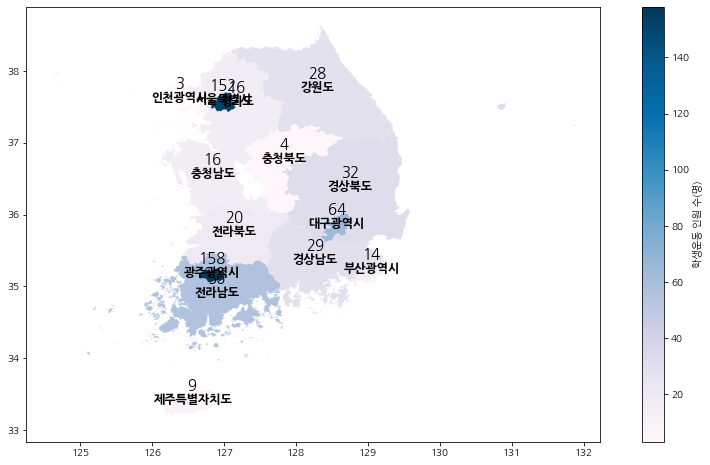

In [30]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams["figure.figsize"] = (15,8)

msk_dp.plot("Data", legend= True, legend_kwds={"label":"학생운동 인원 수(명)"}, cmap= 'PuBu')

for abc in range(0, len(msk_centroid)):
    plt.text(t_gdf['x'][abc], t_gdf['y'][abc], msk_dp['CTP_KOR_NM'][abc], 
        horizontalalignment='center',
        fontdict = {'weight': 'bold', 'size': 12})
    
    plt.text(t_gdf['x'][abc], t_gdf['y'][abc] + 0.18 , msk_dp['Data'][abc], 
        horizontalalignment='center',
        fontdict = {'size': 15})

plt.show()
# 색깔 출처s
# https://jrc-park.tistory.com/155

In [31]:
# 출처
# https://gadm.org/download_country.html
# https://blog.daum.net/geoscience/1257
# 영리적인 이용일 시 허락이 필요한 파일이다.
# 남한 파일과 다르게 북한 파일은 다른 사이트에서 다운받아 온 것이라 데이터가 조금 다르다.

# mnk = map north korea
nk_file = "C:\python_vscode\gadm36_PRK_shp\gadm36_PRK_1.shp"
mnk = gpd.read_file(nk_file, encoding = 'utf-8')
# mnk

In [32]:
# dp = Data Processing
mnk_dp = mnk.drop([mnk.index[0], mnk.index[3], mnk.index[4], mnk.index[5], mnk.index[6],
                    mnk.index[7], mnk.index[10], mnk.index[11], mnk.index[12], mnk.index[13]])
mnk_dp.reset_index(drop=True, inplace= True)
mnk_dp['Data'] = [15,3,5,3]
mnk_dp

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,Data
0,PRK,North Korea,PRK.2_1,Hamgyŏng-bukto,North Hamgyong|Kankyo Hoku-do,함경북도,Do,Province,None,KP.HG,"MULTIPOLYGON (((129.54680 40.64819, 129.54680 ...",15
1,PRK,North Korea,PRK.3_1,Hamgyŏng-namdo,South Hamgyong|Kankyo Nan-do,함경남도,Do,Province,None,KP.HN,"MULTIPOLYGON (((127.53819 39.37098, 127.53819 ...",3
2,PRK,North Korea,PRK.9_1,P'yŏngan-bukto,North Pyongan|Heian Hoku-do,\t평안북도,Do,Province,None,KP.PB,"MULTIPOLYGON (((124.72125 39.27209, 124.72125 ...",5
3,PRK,North Korea,PRK.10_1,P'yŏngan-namdo,South Pyongan|Heian Nan-do,평안남도,Do,Province,None,KP.PN,"MULTIPOLYGON (((125.12959 38.88070, 125.12959 ...",3


In [33]:
mnk_centroid = mnk_dp.geometry.centroid
# mnk_centroid
t2_gdf = gpd.GeoDataFrame({'x' : [], 'y' : []})
t2_gdf["x"] = mnk_dp.centroid.map(lambda p: p.x)
t2_gdf["y"] = mnk_dp.centroid.map(lambda p: p.y)
# t2_gdf

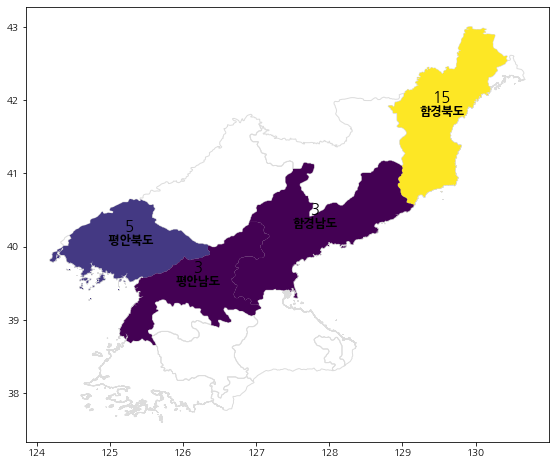

In [34]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams["figure.figsize"] = (15,8)

# mnk_re.plot("Data", legend= True, legend_kwds={"label":"학생운동 인원 수(명)"}, cmap= 'PuBu')

ax1 = mnk.plot(color ='none', edgecolor='gainsboro')
mnk_dp.plot("Data", ax=ax1)
# mnk_dp.plot("Data", figsize=(10,5), ax=ax1, cmap= 'PuBu')


for zz in range(0, len(mnk_centroid)):
    plt.text(t2_gdf['x'][zz], t2_gdf['y'][zz], mnk_dp['NL_NAME_1'][zz], 
        horizontalalignment='center',
        fontdict = {'weight': 'bold', 'size': 12})
    
    plt.text(t2_gdf['x'][zz], t2_gdf['y'][zz] + 0.18, mnk_dp['Data'][zz], 
        horizontalalignment='center',
        fontdict = {'size': 15})

plt.show()

In [35]:
# 잘못 만들어서 다시 제작
sk_file = "C:\python_vscode\CTPRVN_202101\TL_SCCO_CTPRVN.shp"
msk = gpd.read_file(sk_file, encoding = 'cp949')
msk = msk.to_crs({'init':'epsg:4326'})
# msk

nk_file = "C:\python_vscode\gadm36_PRK_shp\gadm36_PRK_1.shp"
mnk = gpd.read_file(nk_file, encoding = 'utf-8')
# mnk

# 어떤 좌표계로 만들어진 데이터 인지를 확인한다.
# 출처 https://yganalyst.github.io/spatial_analysis/spatial_analysis_1/
# print(msk.crs)
# print(mnk.crs)

In [36]:
# 대한민국
mmsk_dp = msk.drop(columns=['CTPRVN_CD', 'CTP_ENG_NM'], axis=1)
mmsk_dp = mmsk_dp.drop(index=[6, 9, 10], axis=0)

mmsk_dp.reset_index(drop=True, inplace= True)
mmsk_dp['Data'] = [ 28, 16, 29, 32, 158, 64, 14, 152, 3, 56, 20, 9, 16, 4]
mmsk_dp

,CTP_KOR_NM,geometry,Data
0,강원도,"MULTIPOLYGON (((129.34455 37.17130, 129.34456 ...",28
1,경기도,"MULTIPOLYGON (((126.73088 37.04639, 126.73141 ...",16
2,경상남도,"MULTIPOLYGON (((128.08435 34.50367, 128.08456 ...",29
3,경상북도,"MULTIPOLYGON (((129.40094 36.02160, 129.40104 ...",32
4,광주광역시,"POLYGON ((126.76029 35.25870, 126.76105 35.258...",158
5,대구광역시,"POLYGON ((128.69604 36.01557, 128.69678 36.014...",64
6,부산광역시,"MULTIPOLYGON (((129.00375 35.08625, 129.00377 ...",14
7,서울특별시,"POLYGON ((127.12667 37.46863, 127.12667 37.468...",152
8,인천광역시,"MULTIPOLYGON (((126.34274 37.64355, 126.34254 ...",3
9,전라남도,"MULTIPOLYGON (((126.92181 33.98876, 126.92178 ...",56


In [37]:
# 북한
mmnk_dp = mnk.drop(columns=['GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1', 'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1'], axis=1)
mmnk_dp = mmnk_dp.drop(index = [0,3,4,5,6,7,10,11,12,13], axis=0)
mmnk_dp.columns = ['CTP_KOR_NM', 'geometry']
mmnk_dp.reset_index(drop=True, inplace= True)
mmnk_dp['Data'] = [15,3,5,3]
# mmnk_dp

In [38]:
# 남한 + 북한 전체범위

tmsk_dp = msk.drop(columns=['CTPRVN_CD', 'CTP_ENG_NM'], axis=1)
tmsk_dp.reset_index(drop=True, inplace= True)
# tmsk_dp

tmnk_dp = mnk.drop(columns=['GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1', 'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1'], axis=1)
tmnk_dp.columns = ['CTP_KOR_NM', 'geometry']
tmnk_dp.reset_index(drop=True, inplace= True)
# tmnk_dp

tmk_dp = gpd.GeoDataFrame( pd.concat([tmsk_dp, tmnk_dp], ignore_index=True) )
# tmk_dp

In [39]:
mmk_dp = gpd.GeoDataFrame( pd.concat([mmsk_dp, mmnk_dp], ignore_index=True) )
# mmk_dp

In [40]:
mmk_centroid = mmk_dp.geometry.centroid
# mmk_centroid
t3_gdf = gpd.GeoDataFrame({'x' : [], 'y' : []})
t3_gdf["x"] = mmk_dp.centroid.x
t3_gdf["y"] = mmk_dp.centroid.y
# t3_gdf

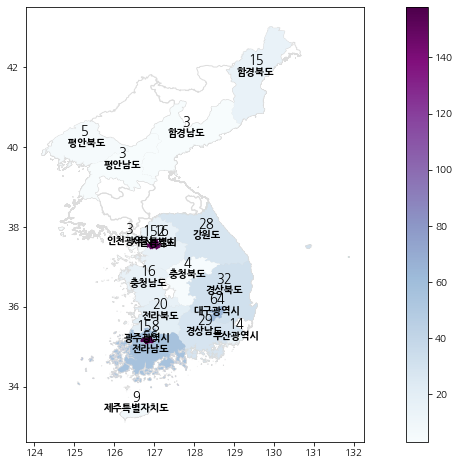

In [41]:
import matplotlib.cm as cm
import matplotlib.patches as mpatch
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['font.family'] = 'NanumGothic'


ax_k = tmk_dp.plot(color ='none', edgecolor='gainsboro')
mmk_dp.plot("Data", ax= ax_k, cmap ='BuPu', legend = True)


for n in range(0, len(mmk_centroid)):
    # 지역명

    plt.text(t3_gdf['x'][n], t3_gdf['y'][n], mmk_dp['CTP_KOR_NM'][n], 
        horizontalalignment='center',
        fontdict = {'weight': 'bold', 'size': 10})
    
    # 인원 수(명)
    plt.text(t3_gdf['x'][n], t3_gdf['y'][n] + 0.26, mmk_dp['Data'][n], 
        horizontalalignment='center',
        fontdict = {'size': 13})

# plt.show()
plt.savefig('savefig_default.png')

In [42]:
# plt.rcParams["figure.figsize"] = (20,10)
# fig = plt.subplot(1, figsize=(20,10), facecolor = 'bone')

# cmap2 = cm.get_cmap('Blues')
# white_patch = mpatch.Patch(color=cmap2(0.0), label='0 - 10')
# lowblue_patch = mpatch.Patch(color=cmap2(0.25), label='10 - 20')
# midblue_patch = mpatch.Patch(color=cmap2(0.5), label='20 - 40')
# highblue_patch = mpatch.Patch(color=cmap2(0.75), label='40 - 60')
# veryblue_patch = mpatch.Patch(color=cmap2(1.0), label='100 - 160')
# plt.legend(handles=[white_patch, lowblue_patch, midblue_patch, highblue_patch, veryblue_patch])

In [3]:
# 일본
# mj = map japn
j_file = "C:\python_vscode\gadm36_JPN_shp\gadm36_JPN_0.shp"
mj_dp = gpd.read_file(j_file, encoding = 'utf-8')
mj_dp
print(mj_dp.crs)

{'init': 'epsg:4326'}


In [21]:
mj_dp['Data'] = [19]
# mj_dp
mj_centroid = mj_dp.geometry.centroid
# mj_centroid
j_gdf = gpd.GeoDataFrame({'x' : [], 'y' : []})
j_gdf["x"] = mj_dp.centroid.map(lambda p: p.x)
j_gdf["y"] = mj_dp.centroid.map(lambda p: p.y)
# j_gdf

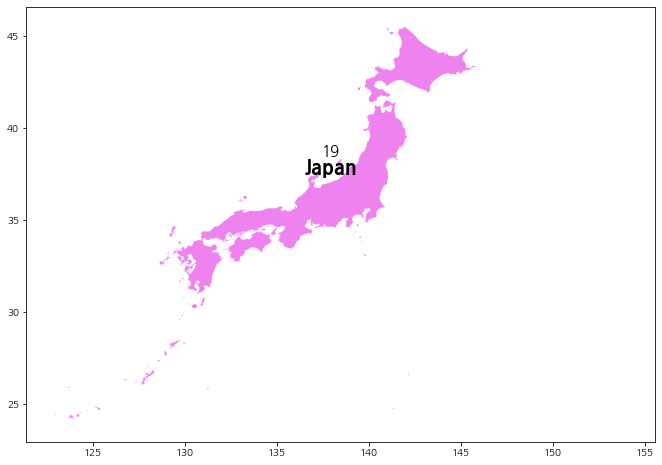

In [22]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams["figure.figsize"] = (15,8)

mj_dp.plot(color = 'violet')

plt.text(j_gdf['x'][0], j_gdf['y'][0], mj_dp['NAME_0'][0], 
        horizontalalignment='center',
        fontdict = {'weight': 'bold', 'size': 20})

plt.text(j_gdf['x'][0], j_gdf['y'][0] + 1, mj_dp['Data'][0], 
        horizontalalignment='center',
        fontdict = {'size': 15})

plt.show()

In [43]:
# 중국
# mcp = map china
c_file = "C:\python_vscode\gadm36_CHN_shp\gadm36_CHN_1.shp"
mc = gpd.read_file(c_file, encoding = 'utf-8')


In [44]:
# 중국북경  1 : 베이징
# 만주지역  10 : 헤이롱장 성, 12 : 후베이 성, 16 : 지린 성, 17 : 라오닝 성
# 필요한 주요 코드
mc_dp = mc.loc[[1,16,10,17]].copy()
mc_dp['Data'] = [3,1,0,0]
mc_dp.reset_index(drop=True, inplace= True)
mc_dp

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,Data
0,CHN,China,CHN.2_1,Beijing,Běijīng,北京|北京,Zhíxiáshì,Municipality,None,CN.BJ,"POLYGON ((116.23775 39.51794, 116.23721 39.522...",3
1,CHN,China,CHN.17_1,Jilin,Jílín,吉林,Shěng,Province,None,CN.JL,"POLYGON ((124.43146 42.94593, 124.43166 42.948...",1
2,CHN,China,CHN.11_1,Heilongjiang,Hēilóngjiāng,黑龙江省|黑龍江省,Shěng,Province,None,CN.HL,"POLYGON ((129.94853 44.02414, 129.94539 44.025...",0
3,CHN,China,CHN.18_1,Liaoning,Liáoníng,遼寧|辽宁,Shěng,Province,None,CN.LN,"MULTIPOLYGON (((121.83236 38.91764, 121.83236 ...",0


C:\Users\user\anaconda3\lib\site-packages\geopandas\plotting.py:470: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
C:\Users\user\AppData\Local\Temp/ipykernel_4036/3321131967.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_dp['Data'][k] = ""
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


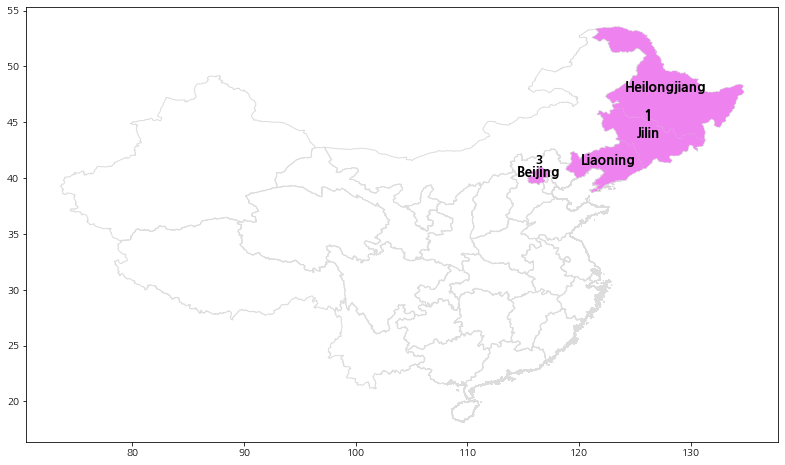

In [45]:
c_centroid = mc_dp.geometry.centroid
c_gdf = gpd.GeoDataFrame({'x' : [], 'y' : []})
c_gdf["x"] = mc_dp.centroid.map(lambda p: p.x)
c_gdf["y"] = mc_dp.centroid.map(lambda p: p.y)

ax_c = mc.plot(color ='none', edgecolor='gainsboro')
mc_dp.plot("Data", ax=ax_c, color = 'violet')

# 0, 1, 2, 3
for k in range(0, len(c_centroid)):

    plt.text(c_gdf['x'][k], c_gdf['y'][k], mc_dp['NAME_1'][k], 
        horizontalalignment='center',
        fontdict = {'weight': 'bold', 'size': 14})

    if(k == 0):
        plt.text(c_gdf['x'][k], c_gdf['y'][k]+1.2, mc_dp['Data'][k], 
            horizontalalignment='center',
            fontdict = {'weight': 'bold', 'size': 12})

    if(k == 1):
        plt.text(c_gdf['x'][k], c_gdf['y'][k]+1.6, mc_dp['Data'][k], 
            horizontalalignment='center',
            fontdict = {'weight': 'bold', 'size': 15})

    elif(k >= 2):
        mc_dp['Data'][k] = ""
        plt.text(c_gdf['x'][k], c_gdf['y'][k]+1.5, mc_dp['Data'][k], 
            horizontalalignment='center',
            fontdict = {'weight': 'bold', 'size': 12})
            
plt.show()

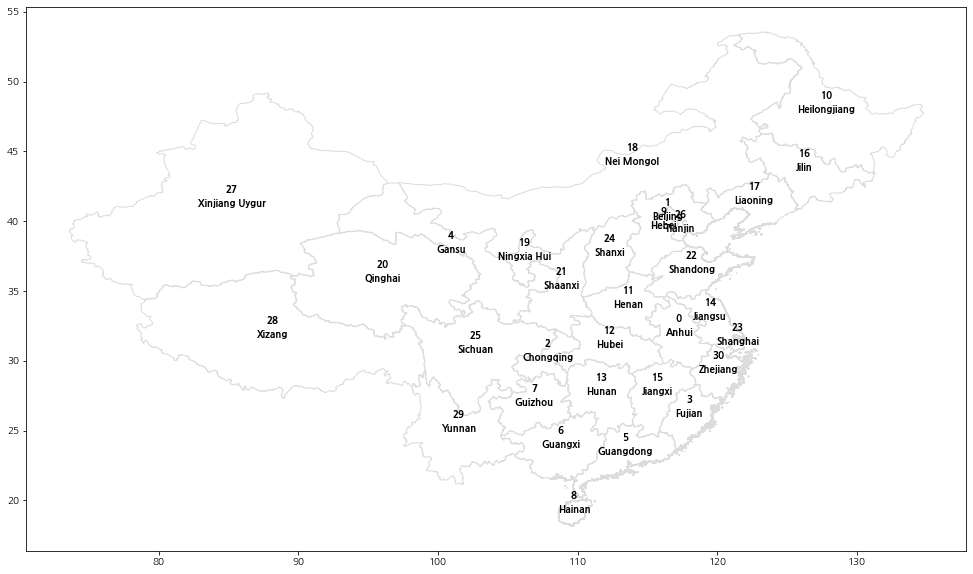

In [46]:
# 지역 위치를 잘 몰라서 확인하기 위한 코드
tmc_centroid = mc.geometry.centroid
tc_gdf = gpd.GeoDataFrame({'x' : [], 'y' : []})
tc_gdf["x"] = mc.centroid.map(lambda p: p.x)
tc_gdf["y"] = mc.centroid.map(lambda p: p.y)

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams["figure.figsize"] = (20,10)

ax_t = mc.plot(color ='none', edgecolor='gainsboro')

for n in range(0, len(tmc_centroid)):
    plt.text(tc_gdf['x'][n], tc_gdf['y'][n], mc['NAME_1'][n], 
        horizontalalignment='center',
        fontdict = {'weight': 'bold', 'size': 10})
        
    plt.text(tc_gdf['x'][n], tc_gdf['y'][n] + 1, n, 
        horizontalalignment='center',
        fontdict = {'weight': 'bold', 'size': 10})


plt.show()

In [47]:
# mcap : map china area part
mcap = mc.drop(index = [[0, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 19, 20, 21, 23, 25, 27, 28, 29, 30], axis=0)
# mcap

SyntaxError: invalid syntax (Temp/ipykernel_4036/4211779811.py, line 2)

C:\Users\user\anaconda3\lib\site-packages\geopandas\plotting.py:470: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


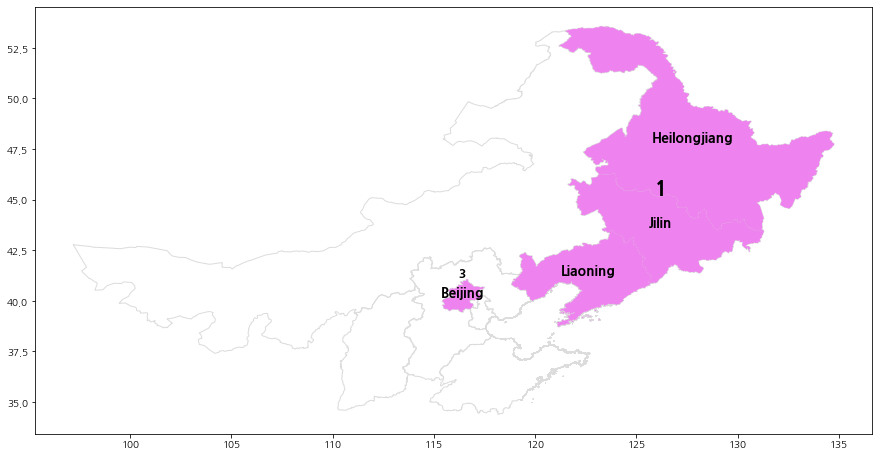

In [ ]:
c_centroid = mc_dp.geometry.centroid
c_gdf = gpd.GeoDataFrame({'x' : [], 'y' : []})
c_gdf["x"] = mc_dp.centroid.map(lambda p: p.x)
c_gdf["y"] = mc_dp.centroid.map(lambda p: p.y)

ax_c = mcap.plot(color ='none', edgecolor='gainsboro')
mc_dp.plot("Data", ax=ax_c, color = 'violet')

# 0, 1, 2, 3
for k in range(0, len(c_centroid)):

    plt.text(c_gdf['x'][k], c_gdf['y'][k], mc_dp['NAME_1'][k], 
        horizontalalignment='center',
        fontdict = {'weight': 'bold', 'size': 14})

    if(k == 0):
        plt.text(c_gdf['x'][k], c_gdf['y'][k]+1, mc_dp['Data'][k], 
            horizontalalignment='center',
            fontdict = {'weight': 'bold', 'size': 12})

    if(k == 1):
        plt.text(c_gdf['x'][k], c_gdf['y'][k]+1.6, mc_dp['Data'][k], 
            horizontalalignment='center',
            fontdict = {'weight': 'bold', 'size': 20})

    elif(k >= 2):
        mc_dp['Data'][k] = ("")
        plt.text(c_gdf['x'][k], c_gdf['y'][k]+1.5, mc_dp['Data'][k], 
            horizontalalignment='center',
            fontdict = {'weight': 'bold', 'size': 12})
            
plt.show()

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
# conda install wordcloud
# conda install -c conda-forge wordcloud

In [5]:
# 1910년도
font = 'C:\Windows\Fonts\gulim.ttc'
result1910 = 'wc_1910.png'

# 파일 읽기
df_wc1 = pd.read_excel("형기_워드클라우드용_JH.xlsx", sheet_name= "1910_단어")
# 인덱스 설정
df_wc1 = df_wc1.set_index("죄명")
print(df_wc1)

ls_wc1 = df_wc1.loc[:, '명수']
# 기존 to_dict() 하면 {'죄명': {0: '출판법, 보안법 위반'}, '명수': {0: 1}}로 나온다.
ls_wc1 = ls_wc1.to_dict()
# 생략
# ls_wc1

     명수
죄명     
출판법   1
보안법   1


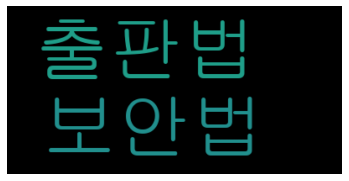

In [6]:
wc = WordCloud(font_path= font, background_color = 'black')
wc.generate_from_frequencies(ls_wc1)
wc.to_file(result1910)

plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
# plt.show()

{'보안법': 23, '제령 7호': 18, '폭력행위': 9, '치안유지법': 5, '출판법': 4, '처벌': 4, '상해죄': 3, '은사': 1, '육군형법': 1}


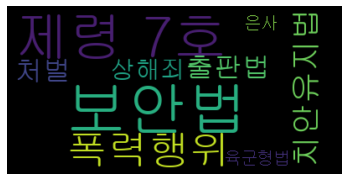

In [7]:
# 1920년도
font = 'C:\Windows\Fonts\gulim.ttc'
result1920 = 'wc_1920.png'

df_wc2 = pd.read_excel("형기_워드클라우드용_JH.xlsx", sheet_name= "1920_단어")
df_wc2 = df_wc2.set_index("죄명")

ls_wc2 = df_wc2.loc[:, '명수']
ls_wc2 = ls_wc2.to_dict()
print(ls_wc2)

# wordcloud = WordCloud(background_color='white', max_words=150, width=1600, height=500).generate(text)
wc2 = WordCloud(font_path= font, background_color = 'black')
wc2.generate_from_frequencies(ls_wc2)
wc2.to_file(result1920)

plt.axis('off')
plt.imshow(wc2, interpolation='bilinear')
# plt.show()

{'치안유지법': 103, '보안법': 64, '출판법': 21, '경찰범처벌규칙 제1조 제39호': 13, '폭력행위': 12, '제령 7호': 5, '주거침입': 3, '공무집행 방해': 1, '육군형법': 1, '불경죄': 1, '전신법': 1, '총포화학류 취체령': 1, '폭팔물 취체규칙': 1, '상해죄': 1, '육해군형법': 1, '칙령 제120호': 1}


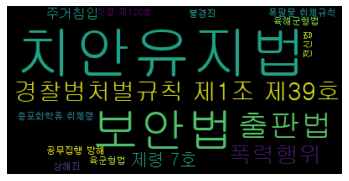

In [8]:
# 1930년도
font = 'C:\Windows\Fonts\gulim.ttc'
result1930 = 'wc_1930.png'

df_wc3 = pd.read_excel("형기_워드클라우드용_JH.xlsx", sheet_name= "1930_단어")
df_wc3 = df_wc3.set_index("죄명")

ls_wc3 = df_wc3.loc[:, '명수']
ls_wc3 = ls_wc3.to_dict()
print(ls_wc3)

wc3 = WordCloud(font_path= font, background_color = 'black')
wc3.generate_from_frequencies(ls_wc3)
wc3.to_file(result1930)

plt.axis('off')
plt.imshow(wc3, interpolation='bilinear')

In [1]:
# tt_wc3 = pd.read_excel("학생운동 편집본 3_JH.xlsx", sheet_name= "1930")
# print(tt_wc3)
# ls_wc3.values()

# sum = 0
# for i in tt_wc3:
#     if(i['명수'] == 1):
#         sum += 1
# print

# # dict 에서 list로 변환
# Name_wc3 = list(ls_wc3.keys())
# # Name_wc3
# Num_wc3 = list(ls_wc3.values())
# # Num_wc3


# plt.title("Pie Chart")
# plt.pie(Num_wc3, labels= Name_wc3, autopct='%1.1f%%', shadow= True, startangle=90)
# plt.show()

{'치안유지법': 69, '보안법': 7, '육해군형법': 5, '폭력행위': 5, '불경죄': 1, '조선임시보안령': 3, '해군형법': 7, '육군형법': 5, '상해죄': 2, '임시보안령': 4, '조선불온문서임시취체령': 1, '처벌법': 1}


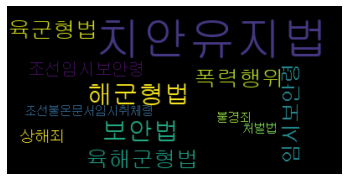

In [13]:
# 1940년도
font = 'C:\Windows\Fonts\gulim.ttc'
result1940 = 'wc_1940.png'

df_wc4 = pd.read_excel("형기_워드클라우드용_JH.xlsx", sheet_name= "1940_단어")
df_wc4 = df_wc4.set_index("죄명")

ls_wc4 = df_wc4.loc[:, '명수']
ls_wc4 = ls_wc4.to_dict()
print(ls_wc4)

wc4 = WordCloud(font_path= font, background_color = 'black')
wc4.generate_from_frequencies(ls_wc4)
wc4.to_file(result1940)

plt.axis('off')
plt.imshow(wc4, interpolation='bilinear')

{'치안유지법': 3, '폭력행위': 1}


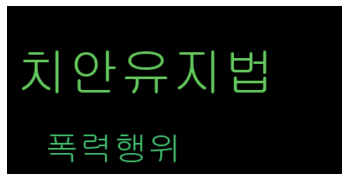

In [17]:
# 0 (미기입)
font = 'C:\Windows\Fonts\gulim.ttc'
result0000 = 'wc_0000.png'

df_wc0 = pd.read_excel("형기_워드클라우드용_JH.xlsx", sheet_name= "0_단어")
df_wc0 = df_wc0.set_index("죄명")

ls_wc0 = df_wc0.loc[:, '명수']
ls_wc0 = ls_wc0.to_dict()
print(ls_wc0)

wc0 = WordCloud(font_path= font, background_color = 'black')
wc0.generate_from_frequencies(ls_wc0)
wc0.to_file(result0000)

plt.axis('off')
plt.imshow(wc0, interpolation='bilinear')

In [2]:
import pandas as pd

In [2]:
# 국민회+대한인국민회
am_n = pd.read_excel('C:\python_vscode\미주방면 Spare_Data.xlsx', sheet_name= "국민회+대한인국민회")
am_n['성명']

0      천세헌
1      차인재
2      차인재
3      차인재
4      김관유
      ... 
738    박대일
739    박대일
740    박대일
741    임배세
742    임배세
Name: 성명, Length: 743, dtype: object

In [3]:
am_ndp = am_n.groupby('성명')
am_ndp.size()

성명
강경숙     3
강명화     2
강영각     1
강영대     7
강영문     3
       ..
홍한식     3
황보영주    2
황보익준    3
황보정걸    4
황인환     1
Length: 282, dtype: int64

In [4]:
# am_ndp.size().to_excel('C:\python_vscode\dm_count.xlsx', encoding='utf-8-sig')

In [9]:
# 공립협회
df_mamk2 = pd.read_excel('C:\python_vscode\미주방면 Spare_Data.xlsx', sheet_name= "공립협회")
df_mamk2['성명']

df_mk2 = df_mamk2.groupby('성명')
# df_mk2.size()
df_mk2.size().to_excel('C:\python_vscode\df_countmk1.xlsx', encoding='utf-8-sig')


In [5]:
# 국민회
df_mamk3 = pd.read_excel('C:\python_vscode\미주방면 Spare_Data.xlsx', sheet_name= "국민회")
df_mamk3['성명']

df_mk3 = df_mamk3.groupby('성명')
df_mk3.size()

df_mk3.size().to_excel('C:\python_vscode\df_countmk3.xlsx', encoding='utf-8-sig')

In [8]:
# 국민회
df_mamk4 = pd.read_excel('C:\python_vscode\미주방면 Spare_Data.xlsx', sheet_name= "대한인국민회")
df_mamk4['성명']

df_mk4 = df_mamk4.groupby('성명')
df_mk4.size()

df_mk4.size().to_excel('C:\python_vscode\df_countmk4.xlsx', encoding='utf-8-sig')